### DATOS INICIALES

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [261]:
# Definiciones Utiles
AU = 1.496 * (10**(11)) #m
KM = 1000 #m

# Radios Orbitales
RADIO_ORBITAL_SATURNO = 9.54 * AU
RADIO_ORBITAL_JUPITER = 5.20 * AU
RADIO_ORBITAL_TIERRA = 1.0 * AU

# Radios
RADIO_SATURNO = 58200 * KM
RADIO_JUPITER = 71500 * KM
RADIO_TIERRA = 6378 * KM

# Parametros de Masa
U_SATURNO = 3.79312 * (10**(16))
U_JUPITER = 1.26687 * (10**(17))
U_TIERRA = 3.986 * (10**(14))
U_SOL = 1.32712 * (10**(20))

Excentricidad_alrededor_sol_inicial = 1.1
Radio_Perihelio_sol_inicial = 1.2 * AU

Distancia_minima_con_saturno = 10**(5) * KM

matriz_de_giro = lambda alpha: np.array([[np.cos(alpha), -np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])

def polar_grafic(a, e, label="", angle=0, xlimit=(-2E12, 2E12), ylimit=(-1.5E12, 1.5E12), color=None):
    global fig, ax
    angle -= np.deg2rad(180)
    theta = np.arange(0, (4 * np.pi), 0.01)
    r = (a*(1-e**2))/(1+e*np.cos(theta))
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    xy = np.array([x, y])
    matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    xy_gir = np.matmul(matrix, xy)
    ax.plot(xy_gir[0], xy_gir[1], label=label, color=color)
    plt.xlim(xlimit[0], xlimit[1])
    plt.ylim(ylimit[0], ylimit[1])

def polar_grafic_hyperbola(a, e, label="", angle=0, xlimit=(-2E12, 2E12), ylimit=(-1.5E12, 1.5E12), color=None):
    global fig, ax
    angle -= np.deg2rad(180)
    theta = np.arange(-np.pi*3.24/6, np.pi*3.24/6, 0.0001)
    r = (a*(e**2-1))/(1+e*np.cos(theta))
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    xy = np.array([x, y])
    matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    xy_gir = np.matmul(matrix, xy)
    ax.scatter(xy_gir[0], xy_gir[1], label=label, s = [0.25 for _ in xy_gir[1]], color=color)
    plt.xlim(xlimit[0], xlimit[1])
    plt.ylim(ylimit[0], ylimit[1])

2a)

In [4]:
v_infinito_orbita_saturno = np.sqrt(((Excentricidad_alrededor_sol_inicial-1)*U_SOL)/Radio_Perihelio_sol_inicial)
print(f"v_infinito_orbita_saturno: {v_infinito_orbita_saturno} m/s")
v_entrada_SOI_saturno = np.sqrt(
    (v_infinito_orbita_saturno**2)
    + 2 * (U_SOL/RADIO_ORBITAL_SATURNO)
)
print(f"v_entrada_SOI_saturno: {v_entrada_SOI_saturno} m/s")

h_orbital_saturno = np.sqrt(Radio_Perihelio_sol_inicial*(1+Excentricidad_alrededor_sol_inicial)*U_SOL)
print(f"h_orbital_saturno: {h_orbital_saturno}")

anomalia_verdadera_en_saturno = np.deg2rad(360) - np.arccos((h_orbital_saturno**2/(U_SOL*RADIO_ORBITAL_SATURNO) - 1)/Excentricidad_alrededor_sol_inicial)
print(f"anomalia_verdadera_en_saturno: {np.rad2deg(anomalia_verdadera_en_saturno)}")

v_sat_SOI = np.array([np.sin(anomalia_verdadera_en_saturno)*(U_SOL/h_orbital_saturno)*Excentricidad_alrededor_sol_inicial, (np.cos(anomalia_verdadera_en_saturno)*Excentricidad_alrededor_sol_inicial+1)*(U_SOL/h_orbital_saturno)])
VELOCIDAD_ORBITAL_SATURNO = np.sqrt(U_SOL/RADIO_ORBITAL_SATURNO)

print(f"v_sat_SOI: {np.linalg.norm(v_sat_SOI)} where {v_sat_SOI} m/s")
vinf_saturn = v_sat_SOI - np.array([0, VELOCIDAD_ORBITAL_SATURNO])
print(f"vinf_saturn: {np.linalg.norm(vinf_saturn)} where {vinf_saturn} m/s")

v_infinito_orbita_saturno: 8598.02447981144 m/s
v_entrada_SOI_saturno: 16121.521213178852 m/s
h_orbital_saturno: 7073285114004666.0
anomalia_verdadera_en_saturno: 228.0136387942821
v_sat_SOI: 16121.52121317885 where [-15340.80801612   4956.11295671] m/s
vinf_saturn: 16040.82023937715 where [-15340.80801612  -4686.95246025] m/s


2b)

In [5]:
Excentricidad_alrededor_de_saturno = 1 + ((np.linalg.norm(vinf_saturn)**2) * Distancia_minima_con_saturno)/U_SATURNO
print(f"Excentricidad_alrededor_de_saturno: {Excentricidad_alrededor_de_saturno}")

a_alrededor_de_saturno = U_SATURNO/(np.linalg.norm(vinf_saturn)**2)
print(f"a_alrededor_de_saturno: {a_alrededor_de_saturno} m or {a_alrededor_de_saturno/AU} AU")

Excentricidad_alrededor_de_saturno: 1.6783542676003174
a_alrededor_de_saturno: 147415597.97913653 m or 0.0009853983822134794 AU


2c)

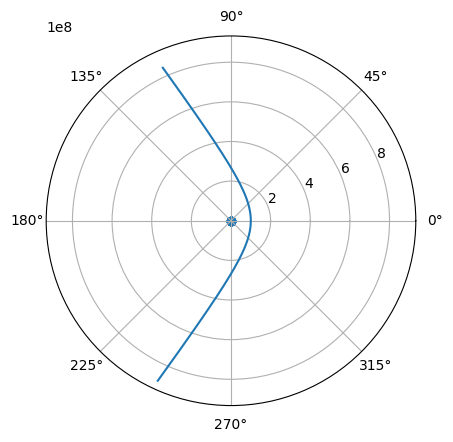

In [6]:
theta = np.arange(-2, 2, 0.01)
r = (a_alrededor_de_saturno*(Excentricidad_alrededor_de_saturno**2 - 1))/(1+Excentricidad_alrededor_de_saturno*np.cos(theta))
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.scatter(np.arange(0, 2*np.pi), [0 for _ in np.arange(0, 2*np.pi)])

In [7]:
ANGULO_DE_GIRO = -np.arccos(1/Excentricidad_alrededor_de_saturno) + np.arctan(vinf_saturn[1]/vinf_saturn[0])

print(f"ANGULO_DE_GIRO: {np.rad2deg(ANGULO_DE_GIRO)} degrees")

ANGULO_DE_GIRO: -36.43970561544031 degrees


In [8]:
x = r*np.cos(theta)
y = r*np.sin(theta)
xy = np.array([x, y])
matrix = matriz_de_giro(ANGULO_DE_GIRO)
hipergir = np.matmul(matrix, xy)

In [9]:
linea_orbital_saturno = lambda x: (-1/(np.arctan(anomalia_verdadera_en_saturno)))*x
linea_heliocentrica_saturno = lambda x: (np.arctan(anomalia_verdadera_en_saturno))*x
x_points = np.arange(-2E15, 2E15, 0.01*2E15)

(-300000000.0, 300000000.0)

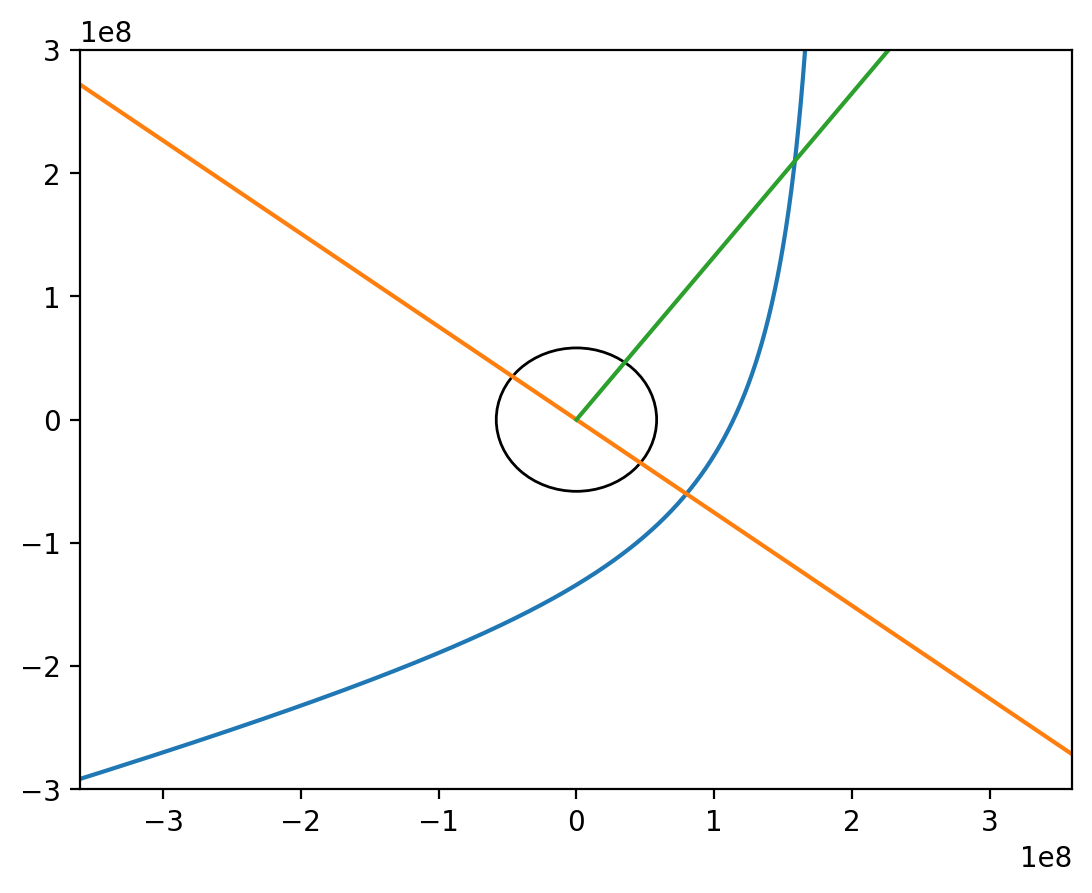

In [10]:
fig, ax = plt.subplots(dpi=200)
ax.plot(hipergir[0], hipergir[1])
Drawing_uncolored_circle = plt.Circle( xy=(0.0, 0.0), radius=RADIO_SATURNO, fill = False )
ax.plot(x_points, linea_orbital_saturno(x_points))
ax.plot(np.arange(0, 2E15, 0.01*2E15), linea_heliocentrica_saturno(np.arange(0, 2E15, 0.01*2E15)))
ax.add_artist( Drawing_uncolored_circle )
plt.xlim(-3.6E8, 3.6E8)
plt.ylim(-3E8, 3E8)

2d)

In [11]:
ANGULO_DE_GIRO = 2*np.arcsin(1/Excentricidad_alrededor_de_saturno)
print(f"ANGULO_DE_GIRO: {np.rad2deg(ANGULO_DE_GIRO)} degrees")

Matriz_de_giro = matriz_de_giro(ANGULO_DE_GIRO)
vinfpos = np.matmul(Matriz_de_giro, vinf_saturn)
print(f"vinfpos: {vinfpos} wth {np.linalg.norm(vinfpos)} m/s")

v_heliocentrica = vinfpos + np.array([0, VELOCIDAD_ORBITAL_SATURNO])
print(f"v_heliocentrica: {v_heliocentrica} wth {np.linalg.norm(v_heliocentrica)} m/s")

ANGULO_DE_GIRO: 73.14247194310627 degrees
vinfpos: [    36.82388063 -16040.77797221] wth 16040.82023937715 m/s
v_heliocentrica: [   36.82388063 -6397.71255525] wth 6397.81852961023 m/s


2e)

In [12]:
V_H = np.linalg.norm(v_heliocentrica)
a_cometa_salida_saturno = 1/((2/RADIO_ORBITAL_SATURNO)-((V_H**2)/U_SOL))
print(f"a_cometa_salida_saturno: {a_cometa_salida_saturno} m")

h_orbital_solar_despues_saturno = RADIO_ORBITAL_SATURNO*abs(v_heliocentrica[1])
print(f"h_orbital_solar_despues_saturno: {h_orbital_solar_despues_saturno} m^2/s")

Excentricidad_alrededor_sol_despues_saturno = np.sqrt(1-((h_orbital_solar_despues_saturno**2)/(U_SOL*a_cometa_salida_saturno)))
print(f"Excentricidad_alrededor_sol_despues_saturno: {Excentricidad_alrededor_sol_despues_saturno}")


a_cometa_salida_saturno: 914969075253.505 m
h_orbital_solar_despues_saturno: 9130712995455930.0 m^2/s
Excentricidad_alrededor_sol_despues_saturno: 0.5598369674772782


In [13]:
ANGULO_GAMMA = (anomalia_verdadera_en_saturno) + np.arcsin(((v_heliocentrica[0]*h_orbital_solar_despues_saturno))/(U_SOL*Excentricidad_alrededor_sol_despues_saturno))
np.rad2deg(ANGULO_GAMMA)

228.27292928754585

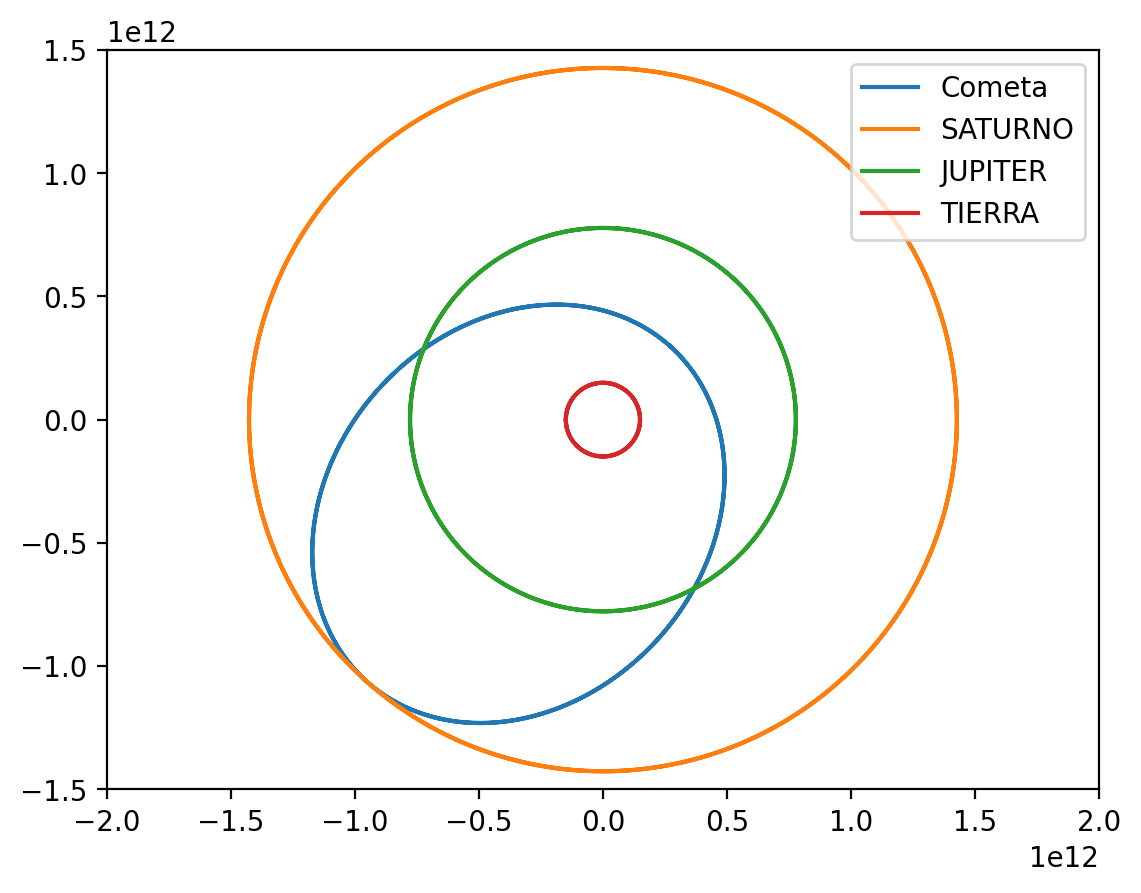

In [14]:
fig, ax = plt.subplots(dpi=200)
polar_grafic(a=a_cometa_salida_saturno, e=Excentricidad_alrededor_sol_despues_saturno, label="Cometa", angle=ANGULO_GAMMA)
polar_grafic(a=RADIO_ORBITAL_SATURNO, e=0, label="SATURNO")
polar_grafic(a=RADIO_ORBITAL_JUPITER, e=0, label="JUPITER")
polar_grafic(a=RADIO_ORBITAL_TIERRA, e=0, label="TIERRA")
plt.legend(loc='upper right')
plt.show()

# 3

3a)

In [15]:
velocidad_cometa_entrada_orbita_jupiter = np.sqrt(U_SOL * ((2/RADIO_ORBITAL_JUPITER) - (1/a_cometa_salida_saturno)))
print(f"velocidad_cometa_entrada_orbita_jupiter: {velocidad_cometa_entrada_orbita_jupiter} m/s")

anomalia_verdadera_en_jupiter_entrada = np.arccos((1/Excentricidad_alrededor_sol_despues_saturno)*((h_orbital_solar_despues_saturno**2)/(U_SOL*RADIO_ORBITAL_JUPITER)-1) )
print(f"anomalia_verdadera_en_jupiter_entrada: {np.rad2deg(anomalia_verdadera_en_jupiter_entrada)} degrees")

v_heliocentrica_entrada_jupiter_respecto_sol = -np.array([np.sin(anomalia_verdadera_en_jupiter_entrada)*(U_SOL/h_orbital_solar_despues_saturno)*Excentricidad_alrededor_sol_despues_saturno, (np.cos(anomalia_verdadera_en_jupiter_entrada)*Excentricidad_alrededor_sol_despues_saturno+1)*(U_SOL/h_orbital_solar_despues_saturno)])
print(f"v_heliocentrica_entrada_jupiter_respecto_sol: {v_heliocentrica_entrada_jupiter_respecto_sol} m/s")

VELOCIDAD_ORBITAL_JUPITER = np.sqrt(U_SOL/RADIO_ORBITAL_JUPITER)
v_entrada_SOI_jupiter = v_heliocentrica_entrada_jupiter_respecto_sol - np.array([0, VELOCIDAD_ORBITAL_JUPITER])
print(f"v_entrada_SOI_jupiter: {v_entrada_SOI_jupiter} m/s")

velocidad_cometa_entrada_orbita_jupiter: 14005.416770740769 m/s
anomalia_verdadera_en_jupiter_entrada: 110.10721584313266 degrees
v_heliocentrica_entrada_jupiter_respecto_sol: [ -7641.10623595 -11737.34188021] m/s
v_entrada_SOI_jupiter: [ -7641.10623595 -24798.67868499] m/s


In [16]:
a_alrededor_de_jupiter = U_JUPITER/np.linalg.norm(v_entrada_SOI_jupiter)**2
print(f"a_alrededor_de_jupiter: {a_alrededor_de_jupiter} m")

a_alrededor_de_jupiter: 188141287.99647534 m


In [207]:
np.rad2deg(anomalia_verdadera_en_jupiter_entrada)

110.10721584313266

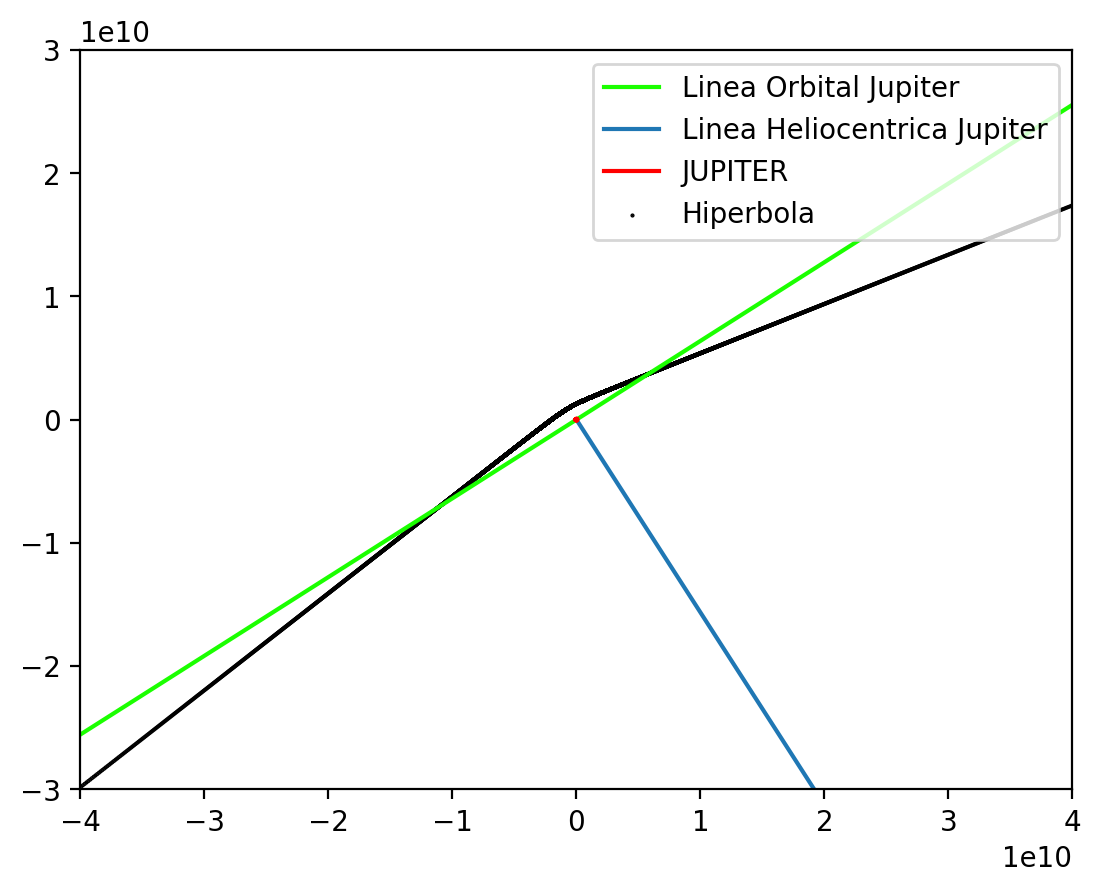

In [262]:
fig, ax = plt.subplots(dpi=200)
factor = 1E10
ax.plot(x_points, linea_orbital_Jupiter(x_points), label="Linea Orbital Jupiter", color="#1BFF00")
ax.plot(np.arange(0, 2E15, 0.01*2E15), linea_heliocentrica_jupiter(np.arange(0, 2E15, 0.01*2E15)), label="Linea Heliocentrica Jupiter")
polar_grafic(a=RADIO_JUPITER, e=0, label="JUPITER", xlimit=(-4*factor, 4*factor), ylimit=(-3*factor, 3*factor), color="#FF0000")
polar_grafic_hyperbola(a=a_alrededor_de_jupiter, e=7, label="Hiperbola", xlimit=(-4*factor, 4*factor), ylimit=(-3*factor, 3*factor), angle=np.deg2rad(-60), color="#000000")
plt.legend(loc='upper right')
plt.show()

3b), 3c), 3d)

3e)

In [137]:
h1 = np.sqrt(234251875*(1 + 2.245084882)* 1.26687 * 1017)

anomalia_verdadera_en_jupiter = np.deg2rad(110.10)

In [162]:
linea_orbital_Jupiter = lambda x: (-1/(np.arctan(anomalia_verdadera_en_jupiter-180)))*x
linea_heliocentrica_jupiter = lambda x: (np.arctan(anomalia_verdadera_en_jupiter-180))*x
x_points = np.arange(-2E15, 2E15, 0.01*2E15)

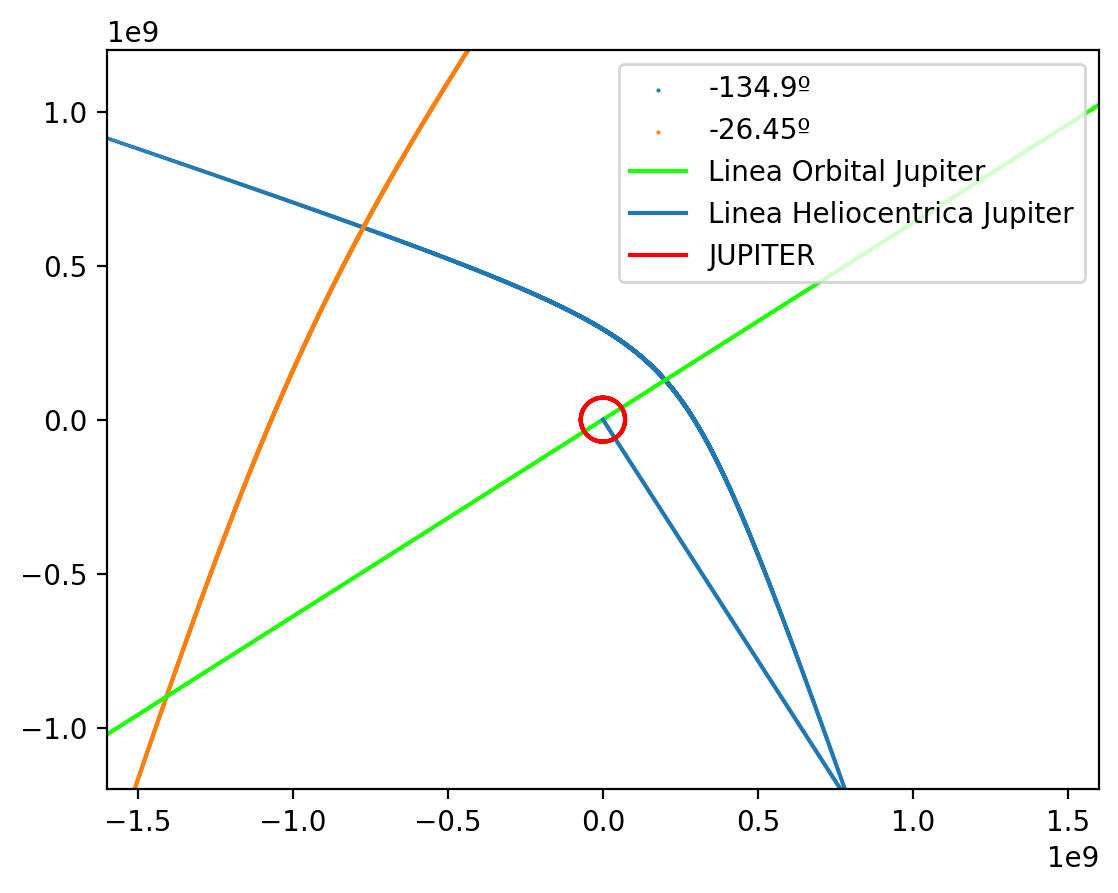

In [163]:
fig, ax = plt.subplots(dpi=200)
a = 1.88141 * (10**8)
e1 = 2.245084882
e2 = 6.171758621
a_inicial = -U_SOL/(v_infinito_orbita_saturno**2)
polar_grafic_hyperbola(a=a, e=e1, label="-134.9º", angle=np.deg2rad(-134.9))
polar_grafic_hyperbola(a=a, e=e2, label="-26.45º", angle=np.deg2rad(-26.45))
factor = 0.4E9
ax.plot(x_points, linea_orbital_Jupiter(x_points), label="Linea Orbital Jupiter", color="#1BFF00")
ax.plot(np.arange(0, 2E15, 0.01*2E15), linea_heliocentrica_jupiter(np.arange(0, 2E15, 0.01*2E15)), label="Linea Heliocentrica Jupiter")
polar_grafic(a=RADIO_JUPITER, e=0, label="JUPITER", xlimit=(-4*factor, 4*factor), ylimit=(-3*factor, 3*factor), color="#FF0000")
plt.legend(loc='upper right')
plt.show()

3f)

3g)

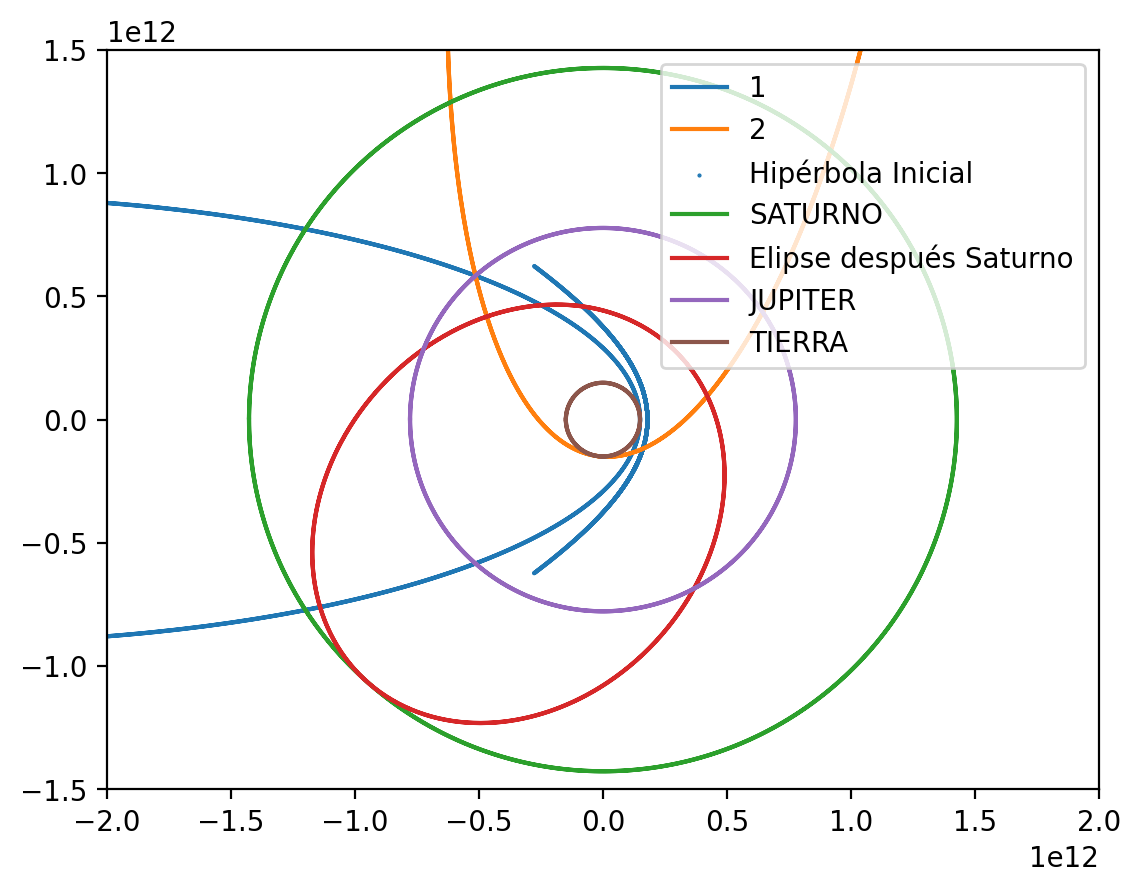

In [164]:
fig, ax = plt.subplots(dpi=200)
a = 18.7938 * AU
e = 0.94679
a_inicial = -U_SOL/(v_infinito_orbita_saturno**2)
polar_grafic(a=a, e=e, label="1", angle=np.deg2rad(180))
polar_grafic(a=a, e=e, label="2", angle=np.deg2rad(-277.281))
polar_grafic_hyperbola(a=a_inicial, e=Excentricidad_alrededor_sol_inicial, label="Hipérbola Inicial")
polar_grafic(a=RADIO_ORBITAL_SATURNO, e=0, label="SATURNO")
polar_grafic(a=a_cometa_salida_saturno, e=Excentricidad_alrededor_sol_despues_saturno, label="Elipse después Saturno", angle=ANGULO_GAMMA)
polar_grafic(a=RADIO_ORBITAL_JUPITER, e=0, label="JUPITER")
polar_grafic(a=RADIO_ORBITAL_TIERRA, e=0, label="TIERRA")
plt.legend(loc='upper right')
plt.show()

# 4

4a)

In [165]:
a_orbita_eliptica_tierra = 2811554294371 #m (Viene del excel)

In [166]:
v_perihelio = np.array([0, np.sqrt(U_SOL*(2/RADIO_ORBITAL_TIERRA - 1/a_orbita_eliptica_tierra))])

print(f"v_perihelio: {np.linalg.norm(v_perihelio)} where {v_perihelio} m/s")

VELOCIDAD_ORBITAL_TIERRA = np.sqrt(U_SOL/RADIO_ORBITAL_TIERRA)
v_infinito_neg_tierra = v_perihelio - np.array([0, VELOCIDAD_ORBITAL_TIERRA])

print(f"v_infinito_neg_tierra: {np.linalg.norm(v_infinito_neg_tierra)} where {v_infinito_neg_tierra} m/s")

a_hiperbola_tierra = U_TIERRA/(np.linalg.norm(v_infinito_neg_tierra)**2)
print(f"a_hiperbola_tierra: {a_hiperbola_tierra} m")

Radio_perihelio_tierra = 700000 * KM
Excentricidad_alrededor_de_la_tierra = 1 + (np.linalg.norm(v_infinito_neg_tierra)**2 * Radio_perihelio_tierra)/U_TIERRA
print(f"Excentricidad_alrededor_de_la_tierra: {Excentricidad_alrededor_de_la_tierra}")
h_orbital_saturno = np.sqrt(Radio_perihelio_tierra*(1+Excentricidad_alrededor_de_la_tierra)*U_TIERRA)
print(f"h_orbital_saturno: {h_orbital_saturno}")


v_perihelio: 41557.45707097312 where [    0.         41557.45707097] m/s
v_infinito_neg_tierra: 11773.026583464372 where [    0.         11773.02658346] m/s
a_hiperbola_tierra: 2875815.6650285595 m
Excentricidad_alrededor_de_la_tierra: 244.40920334789553
h_orbital_saturno: 8274906399357.627


4b)

In [167]:
velocidad_periapsis_hiperbola_tierra = np.sqrt(2*(  (np.linalg.norm(v_infinito_neg_tierra)**2)/2 + U_TIERRA/Radio_perihelio_tierra  ))
print(f"velocidad_periapsis_hiperbola_tierra: {velocidad_periapsis_hiperbola_tierra}")

velocidad_orbital_circular = np.sqrt(U_TIERRA/Radio_perihelio_tierra)
print(f"velocidad_orbital_circular: {velocidad_orbital_circular}")

delta_v = velocidad_orbital_circular - velocidad_periapsis_hiperbola_tierra
print(f"delta_v: {delta_v}")

velocidad_periapsis_hiperbola_tierra: 11821.29485622518
velocidad_orbital_circular: 754.6049108166283
delta_v: -11066.689945408552


4c)

In [183]:
anomalia_verdadera_en_tierra = np.deg2rad(227.281)

In [184]:
linea_orbital_tierra = lambda x: (-1/(np.arctan(anomalia_verdadera_en_tierra)))*x
linea_heliocentrica_tierra = lambda x: (np.arctan(anomalia_verdadera_en_tierra))*x
x_points = np.arange(-2E15, 2E15, 0.01*2E15)

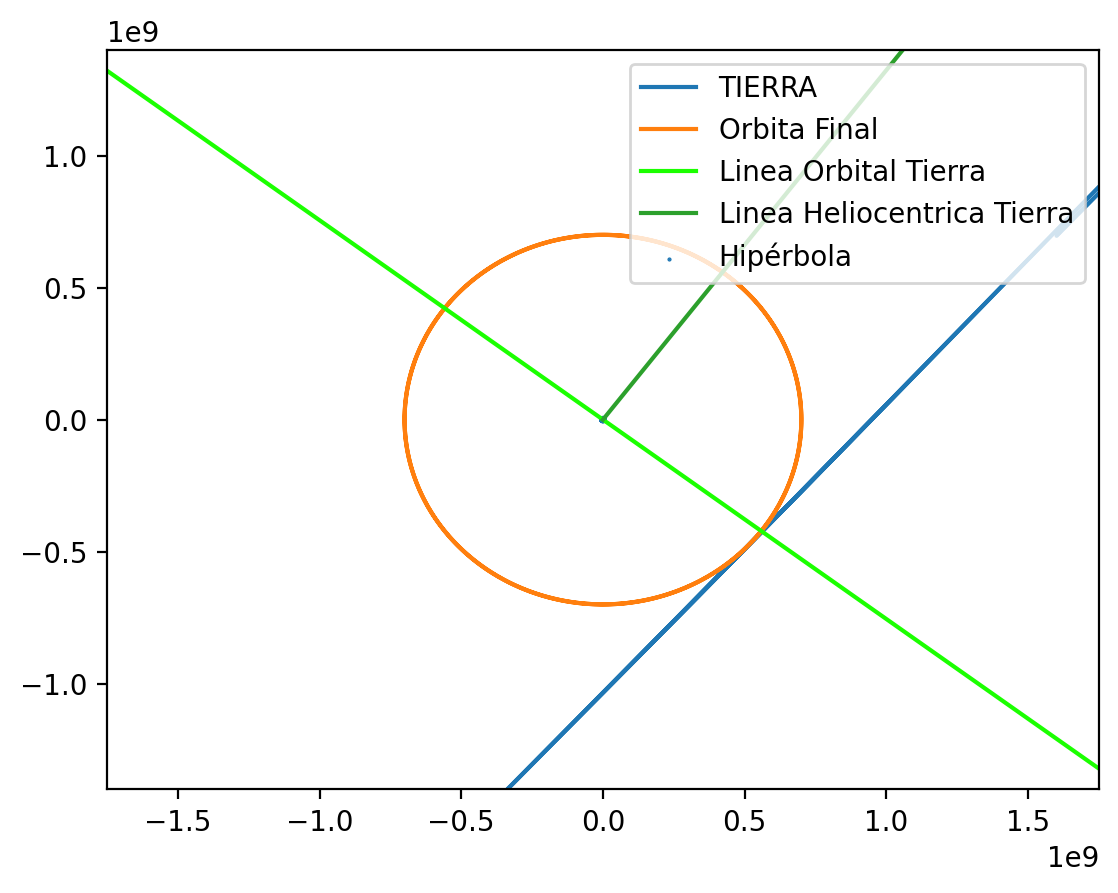

In [185]:
fig, ax = plt.subplots(dpi=200)
polar_grafic(a=RADIO_TIERRA, e=0, label="TIERRA", ylimit=(-4E7, 4E7), xlimit=(-5E7, 5E7))
polar_grafic(a=Radio_perihelio_tierra, e=0, label="Orbita Final", ylimit=(-4E7, 4E7), xlimit=(-5E7, 5E7))
factor = 0.7E9
ax.plot(x_points, linea_orbital_tierra(x_points), label="Linea Orbital Tierra", color="#1BFF00")
ax.plot(np.arange(0, 2E15, 0.01*2E15), linea_heliocentrica_tierra(np.arange(0, 2E15, 0.01*2E15)), label="Linea Heliocentrica Tierra")
polar_grafic_hyperbola(a=a_hiperbola_tierra, e=Excentricidad_alrededor_de_la_tierra, label="Hipérbola", ylimit=(-2*factor, 2*factor), xlimit=(-2.5*factor, 2.5*factor), angle=np.deg2rad(137.515))
plt.legend(loc='upper right')
plt.show()